In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [2]:
#define URL where data is located
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"

#read in data
data_full = pd.read_csv(url)

#select subset of data
data = data_full[["mpg", "disp", "drat", "wt", "qsec", "hp"]]

#view first six rows of data
data[0:6]

,mpg,disp,drat,wt,qsec,hp
0,21.0,160.0,3.90,2.620,16.46,110
1,21.0,160.0,3.90,2.875,17.02,110
2,22.8,108.0,3.85,2.320,18.61,93
3,21.4,258.0,3.08,3.215,19.44,110
4,18.7,360.0,3.15,3.440,17.02,175
5,18.1,225.0,2.76,3.460,20.22,105


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:85: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:85: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:85: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\Users\USER\anaco

Text(0.5, 1.0, 'hp')

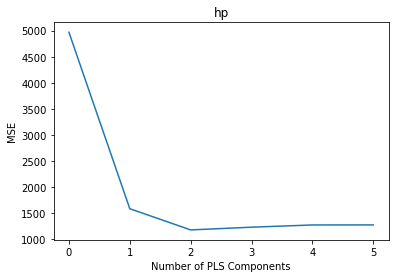

In [3]:
#define predictor and response variables
X = data[["mpg", "disp", "drat", "wt", "qsec"]]
y = data[["hp"]]

#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

In [4]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

29.9094

29.9094